In [21]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [22]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 5e+16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 1.591936e-17 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [23]:
NN = 400

j = 400

filz = np.sort(glob.glob('./Outputs_18k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
print(r.shape)

print('h = ', np.sort(h))

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
rho = data['rho']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

J = []

for i in range(len(x)-NN):
    
    Jt = 0.0
    
    for j in range(NN):
        Jt += x[i+j]*vy[i+j] - y[i+j]*vx[i+j]
    
    J.append([i, Jt/NN])

J = np.array(J)
print('Done !!!')

(18141, 3)
h =  [0.01921133 0.01926854 0.01938527 ... 0.63210684 0.63590517 0.65814613]
rho =  [1.69746262e-21 2.59797153e-21 2.76286631e-21 ... 2.02973304e-16
 2.03468817e-16 2.06972107e-16]
Done !!!


In [24]:
j = 0

#filz = np.sort(glob.glob('./Outputs_10k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
print(r.shape)

print('h = ', np.sort(h))

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
rho = data['rho']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

J0 = []

for i in range(len(x)-NN):
    
    Jt = 0.0
    
    for j in range(NN):
        Jt += x[i+j]*vy[i+j] - y[i+j]*vx[i+j]
    
    J0.append([i, Jt/NN])

J0 = np.array(J0)
print('Done !!!')

(18141, 3)
h =  [0.06602755 0.06602755 0.06602755 ... 0.09525103 0.09525103 0.09525103]
rho =  [1.33736918e-18 1.54131539e-18 1.58419786e-18 ... 4.93664594e-18
 4.94943537e-18 5.04847003e-18]
Done !!!


(0.85, 1.15)

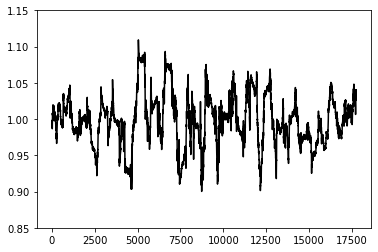

In [25]:
#plt.scatter(J[:, 0], J[:, 1]/J0[:, 1], s = 0.1, color = 'k')
plt.plot(J[:, 0], J[:, 1]/J0[:, 1], color = 'k')
plt.ylim(0.85, 1.15)

(0.85, 1.15)

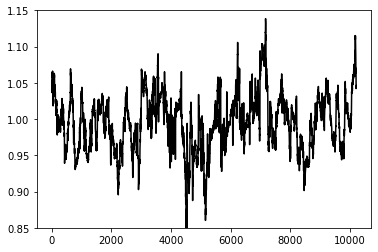

In [10]:
#plt.scatter(J[:, 0], J[:, 1]/J0[:, 1], s = 0.1, color = 'k')
plt.plot(J[:, 0], J[:, 1]/J0[:, 1], color = 'k')
plt.ylim(0.85, 1.15)

(0.85, 1.15)

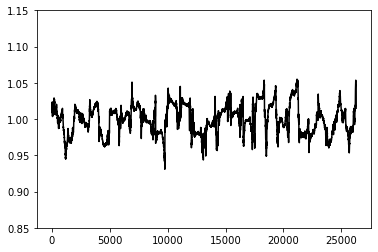

In [32]:
#plt.scatter(J[:, 0], J[:, 1]/J0[:, 1], s = 0.1, color = 'k')
plt.plot(J[:, 0], J[:, 1]/J0[:, 1], color = 'k')
plt.ylim(0.85, 1.15)